In [30]:
import sys, os
os.chdir('G:\My Drive\Documents\PhD\Modelling\_RiceBall')

In [31]:
from ricepaper import RicePaper
from ricepaper.reader import RiceBall
from ricepaper.dykes import DykeFarm

import matplotlib.pyplot as plt
import networkx as nx

In [32]:
R = RicePaper("volcano_control")

In [33]:
#setup simulation as per La Palma demo

#material properties
R.setRadius(1,30)
R.setRadius(2,25)
R.setRadius(3,20)

R.setDensity(1,2500)
R.setDensity(2,2500)
R.setDensity(3,2500)

R.setHertzian(1,2.9e9,0.2)
R.setHertzian(2,2.9e9,0.2)
R.setHertzian(3,2.9e9,0.2)

#set cohesion between edifice and base particles
#R.custom("COH 0.2 1 3")

In [34]:
R.setLinItc(1,1,2e10,2e10)
R.setLinItc(1,2,2e10,2e10)
R.setLinItc(1,3,2e10,2e10)
R.setLinItc(2,2,2e10,2e10)
R.setLinItc(2,3,2e10,2e10)
R.setLinItc(3,3,2e10,2e10)

R.setFrictionItc(1,1,0.3)
R.setFrictionItc(1,2,0.3)
R.setFrictionItc(1,3,0.3)
R.setFrictionItc(2,2,0.3)
R.setFrictionItc(2,3,0.3)
R.setFrictionItc(3,3,0.3)

In [35]:
#numerical properties
R.setDamping() #use defaults
R.setNumericalProperties(timestep=5e-2)

#generate line of balls
R.genLine((25, 75, 50),(25, 4975, 50), 10, 3, 3) #left side
R.genLine((14975, 75, 50),(14975, 4975, 50), 10, 3, 3) #righth side
R.genLine((25, 25, 50),(14975, 25, 50), 10, 3, 3) #bottom side
R.fixDOFAll(True,True,True) #fix DOF on balls

In [36]:
#generate some balls!
R.setDomain(6000,9000,4000,6000,0,100) #domain to create balls in
R.setSeed(50)

R.setGravity((0,-9.8,0)) #set gravity

#create balls and cycle
activeColor = 'g'
altColor = 'b'
for i in range(4):
    R.genBalls(500,1,1,color=activeColor)
    R.genBalls(1000,2,1,color=activeColor)
    R.cycle(2000)
    
    #flip color
    tmp = activeColor
    activeColor = altColor
    altColor = tmp

In [37]:
R.execute(suppress=False)

0

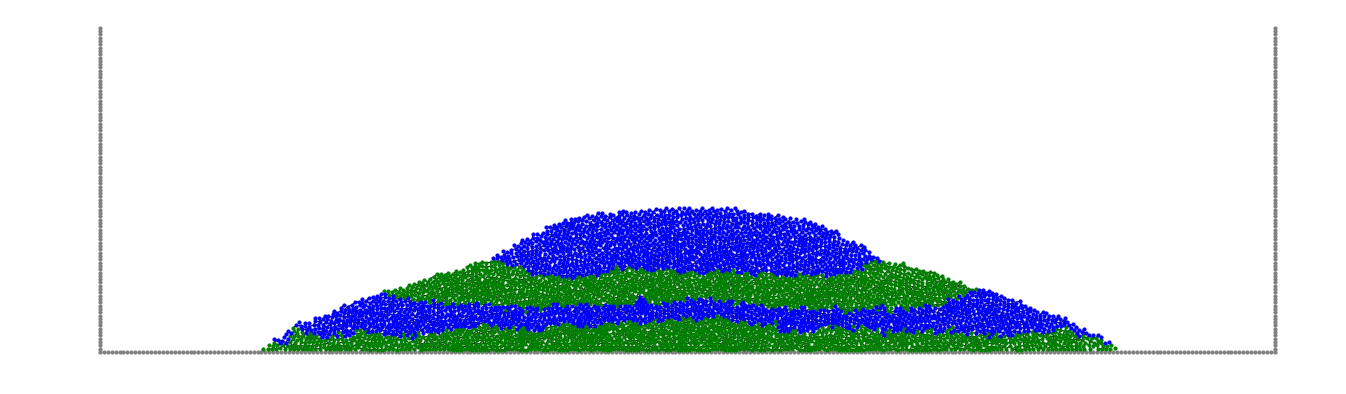

In [38]:
model = R.loadLastOutput()
model.quickPlot()

In [39]:
#shape volcano using cutting lines
deleted = []
deleted = model.cut(4000,25)
deleted += model.cut(11000,-25)

In [40]:
#delete these nodes from the model
R.delBalls(deleted,model.pos)

In [41]:
#calculate and plot as model re-stabilises
R.setNumericalProperties(timestep=2e-2)
out = []
out.append(R.cycle(5)) #initial state
for i in range(5):
    out.append(R.cycle(2500))

#crunch
R.execute()

0

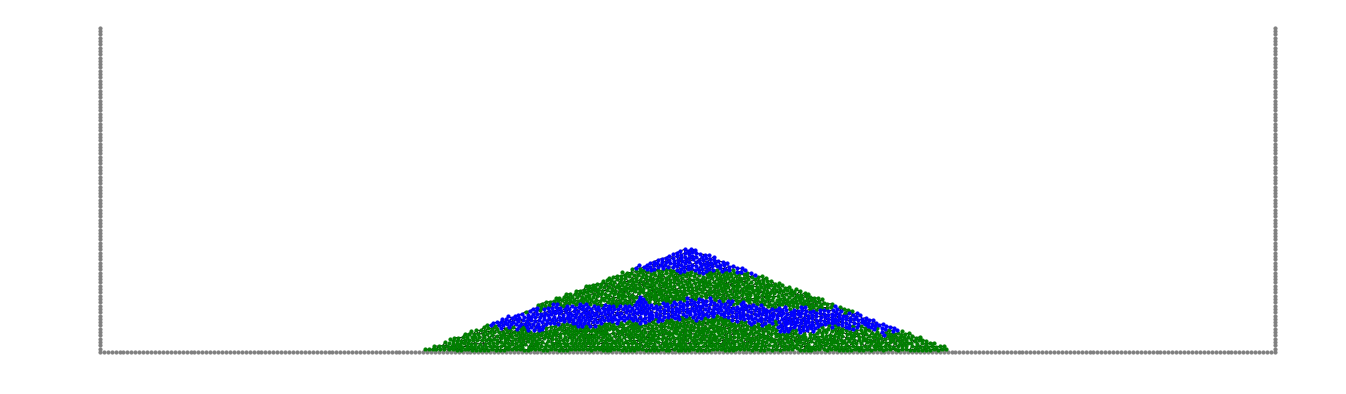

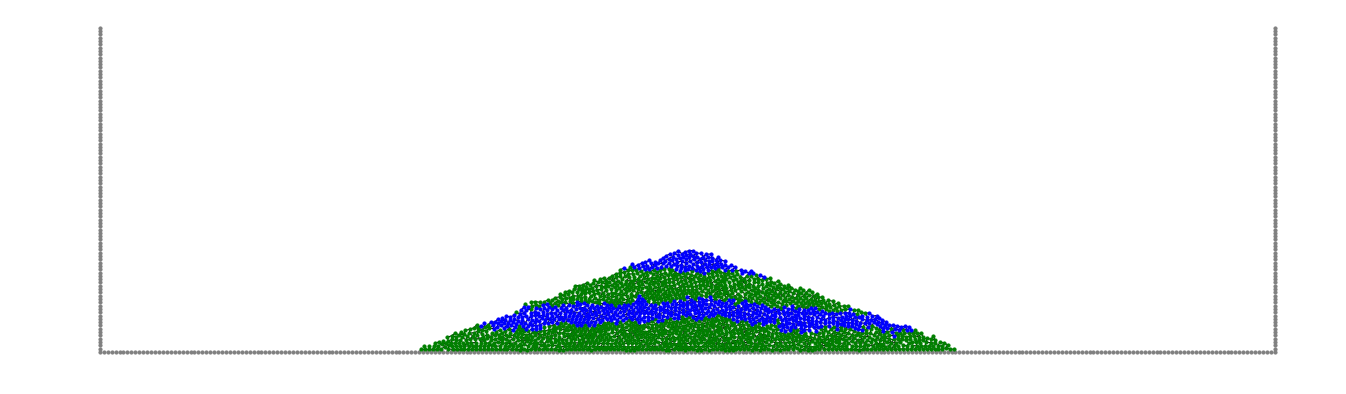

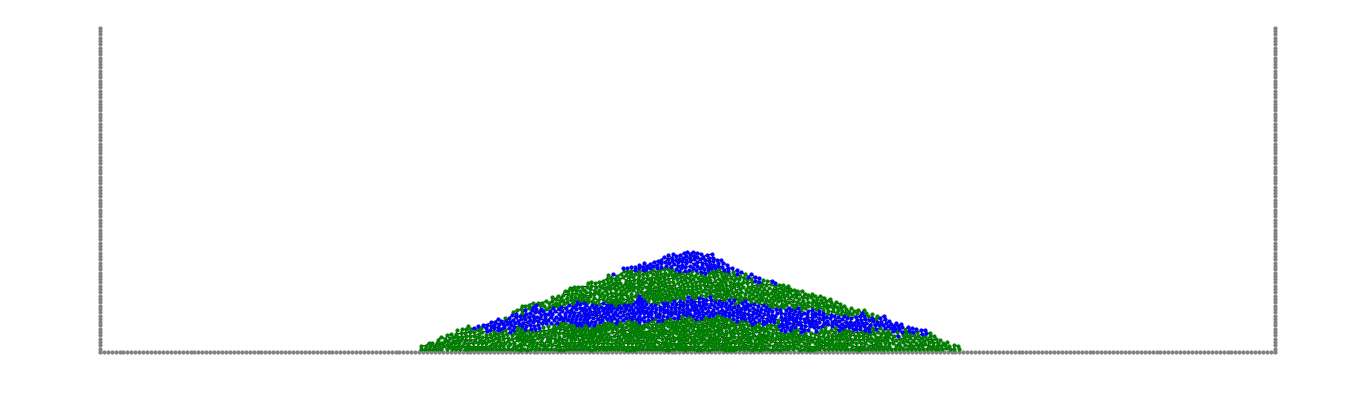

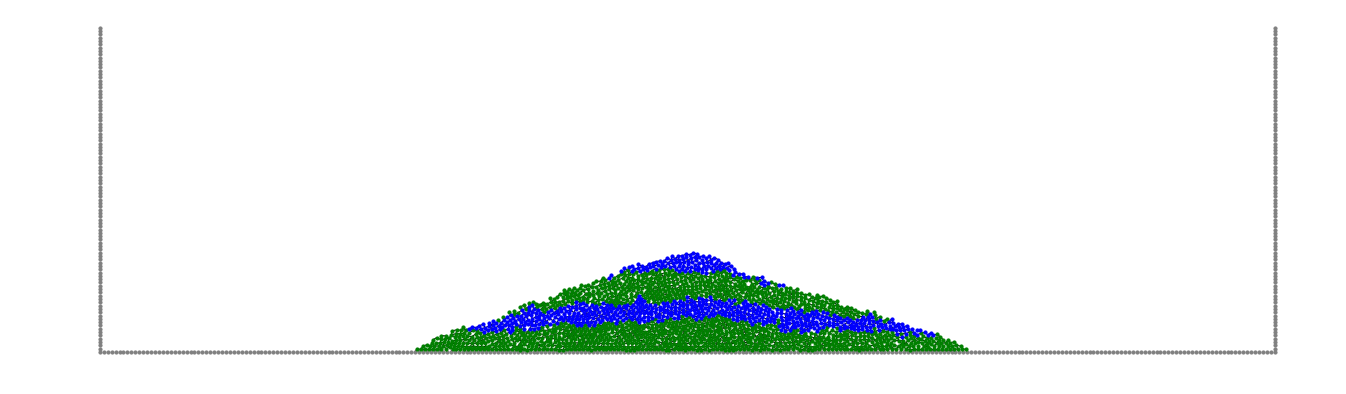

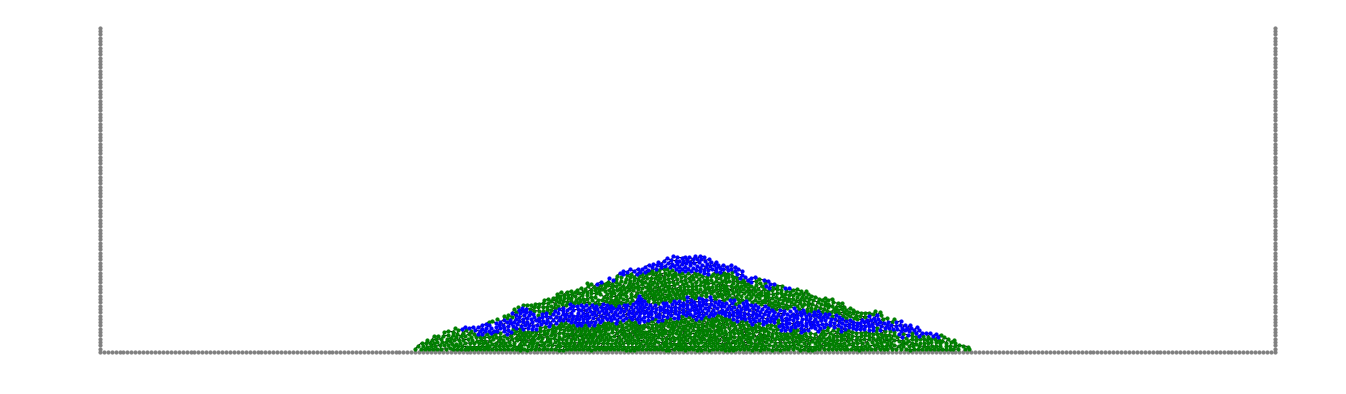

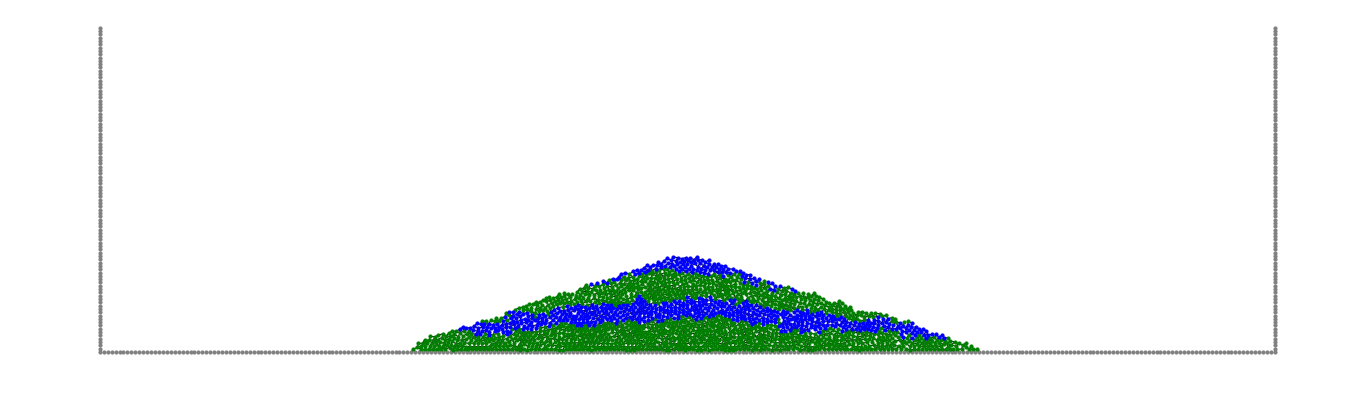

In [42]:
#plot
models = R.loadSteps(out)
for m in models:
    m.quickPlot()